In [17]:
pip install --upgrade biopython


Note: you may need to restart the kernel to use updated packages.


In [29]:
import pandas as pd
import numpy as np
import Bio
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from IPython.display import Image
sns.set()

In [30]:
humandata = pd.read_table('/Users/santruptshekhar/Desktop/healthcare/human/human_data.txt')
humandata.head()

,sequence,class
0,ATGCCCCAACTAAATACTACCGTATGGCCCACCATAATTACCCCCA...,4
1,ATGAACGAAAATCTGTTCGCTTCATTCATTGCCCCCACAATCCTAG...,4
2,ATGTGTGGCATTTGGGCGCTGTTTGGCAGTGATGATTGCCTTTCTG...,3
3,ATGTGTGGCATTTGGGCGCTGTTTGGCAGTGATGATTGCCTTTCTG...,3
4,ATGCAACAGCATTTTGAATTTGAATACCAGACCAAAGTGGATGGTG...,3


In [31]:
humandata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4380 entries, 0 to 4379
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   sequence  4380 non-null   object
 1   class     4380 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 68.6+ KB


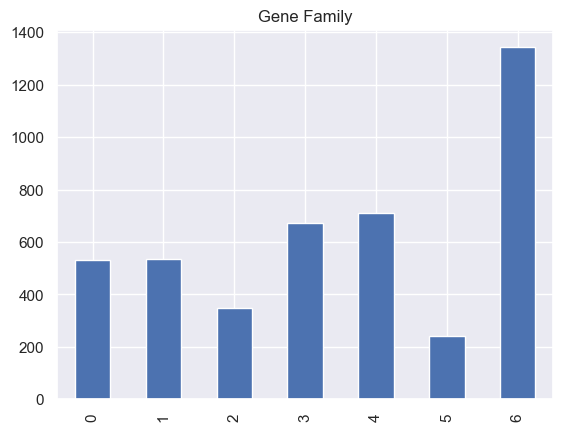

In [32]:
## 4380 Sequences are there
humandata['class'].value_counts().sort_index().plot.bar()
plt.title("Gene Family")
plt.show()

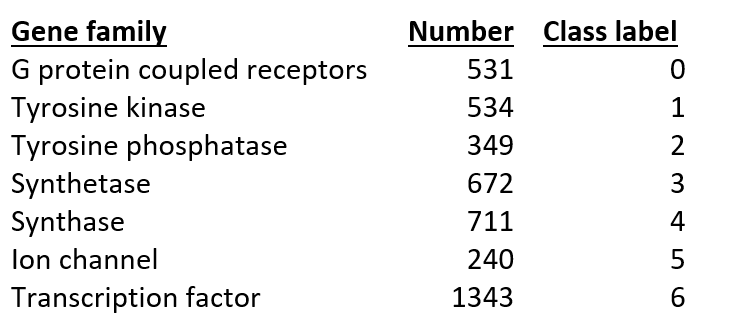

In [33]:
Image('/Users/santruptshekhar/Desktop/healthcare/human/_results_.png')

In [35]:
from Bio.Seq import Seq
my_seq = Seq(humandata["sequence"][0])
print(my_seq)

ATGCCCCAACTAAATACTACCGTATGGCCCACCATAATTACCCCCATACTCCTTACACTATTCCTCATCACCCAACTAAAAATATTAAACACAAACTACCACCTACCTCCCTCACCAAAGCCCATAAAAATAAAAAATTATAACAAACCCTGAGAACCAAAATGAACGAAAATCTGTTCGCTTCATTCATTGCCCCCACAATCCTAG


In [36]:
print(f" Complement : {my_seq.complement()} \n")
print(f"Reverse Complement :  {my_seq.reverse_complement()} " )

 Complement : TACGGGGTTGATTTATGATGGCATACCGGGTGGTATTAATGGGGGTATGAGGAATGTGATAAGGAGTAGTGGGTTGATTTTTATAATTTGTGTTTGATGGTGGATGGAGGGAGTGGTTTCGGGTATTTTTATTTTTTAATATTGTTTGGGACTCTTGGTTTTACTTGCTTTTAGACAAGCGAAGTAAGTAACGGGGGTGTTAGGATC 

Reverse Complement :  CTAGGATTGTGGGGGCAATGAATGAAGCGAACAGATTTTCGTTCATTTTGGTTCTCAGGGTTTGTTATAATTTTTTATTTTTATGGGCTTTGGTGAGGGAGGTAGGTGGTAGTTTGTGTTTAATATTTTTAGTTGGGTGATGAGGAATAGTGTAAGGAGTATGGGGGTAATTATGGTGGGCCATACGGTAGTATTTAGTTGGGGCAT 


In [38]:
humandata["length"] = humandata.sequence.apply(lambda x : len(x))  # finding the length of each DNA Sequence

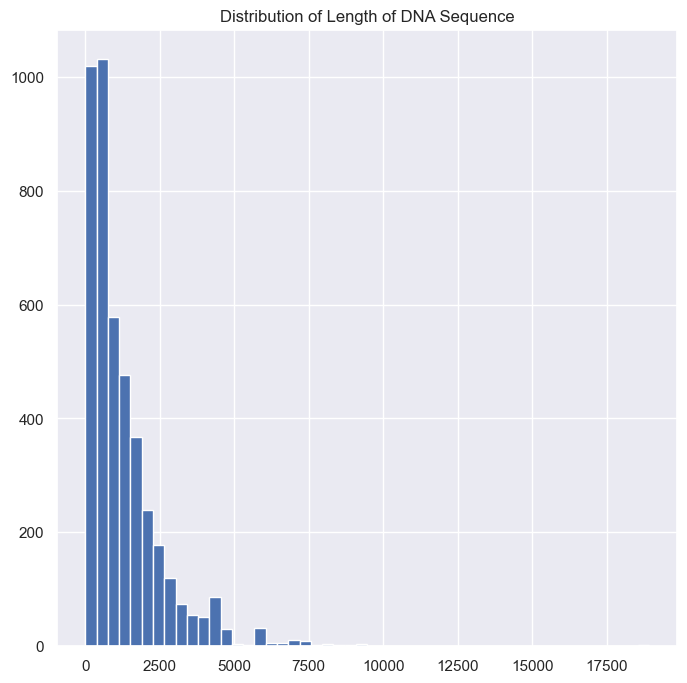

In [39]:
plt.figure(figsize=(8,8));
plt.hist(humandata["length"],bins=50)
plt.title("Distribution of Length of DNA Sequence");

Length of the Sequence varies alot .we have to find a way to make it as constant so that we can apply ML Techniques to this problem

We can use K-mer method to rectify this issue. We can take a long biological sequence and break it down into k-mer length overlapping “words”. For example, if we use words of length 6 (hexamers), “ATGCATGCA” becomes: ‘ATGCAT’, ‘TGCATG’, ‘GCATGC’, ‘CATGCA’. Hence our example sequence is broken down into 4 hexamer words.

In genomics, we refer to these types of manipulations as "**k-mer counting**", or counting the occurances of each possible k-mer sequence.

In [40]:
def getKmers(sequence, size=6):
    return [sequence[x:x+size].upper() for x in range(len(sequence) - size + 1)]

In [41]:
#Now we can convert our training data sequences into short overlapping k-mers of legth 6.

humandata['words'] = humandata.apply(lambda x: getKmers(x['sequence']), axis=1)

In [42]:
humandata.head()

,sequence,class,length,words
0,ATGCCCCAACTAAATACTACCGTATGGCCCACCATAATTACCCCCA...,4,207,"[ATGCCC, TGCCCC, GCCCCA, CCCCAA, CCCAAC, CCAAC..."
1,ATGAACGAAAATCTGTTCGCTTCATTCATTGCCCCCACAATCCTAG...,4,681,"[ATGAAC, TGAACG, GAACGA, AACGAA, ACGAAA, CGAAA..."
2,ATGTGTGGCATTTGGGCGCTGTTTGGCAGTGATGATTGCCTTTCTG...,3,1686,"[ATGTGT, TGTGTG, GTGTGG, TGTGGC, GTGGCA, TGGCA..."
3,ATGTGTGGCATTTGGGCGCTGTTTGGCAGTGATGATTGCCTTTCTG...,3,1206,"[ATGTGT, TGTGTG, GTGTGG, TGTGGC, GTGGCA, TGGCA..."
4,ATGCAACAGCATTTTGAATTTGAATACCAGACCAAAGTGGATGGTG...,3,1437,"[ATGCAA, TGCAAC, GCAACA, CAACAG, AACAGC, ACAGC..."


In [43]:
#We are now going to Convert the words into string and then apply Count Vectorizer  to count the occurrences of each unique k-mer.

humandata["in_string"] =humandata["words"].apply(lambda x:  ' '.join(x))

In [44]:
humandata[["words","in_string"]]

,words,in_string
0,"[ATGCCC, TGCCCC, GCCCCA, CCCCAA, CCCAAC, CCAAC...",ATGCCC TGCCCC GCCCCA CCCCAA CCCAAC CCAACT CAAC...
1,"[ATGAAC, TGAACG, GAACGA, AACGAA, ACGAAA, CGAAA...",ATGAAC TGAACG GAACGA AACGAA ACGAAA CGAAAA GAAA...
2,"[ATGTGT, TGTGTG, GTGTGG, TGTGGC, GTGGCA, TGGCA...",ATGTGT TGTGTG GTGTGG TGTGGC GTGGCA TGGCAT GGCA...
3,"[ATGTGT, TGTGTG, GTGTGG, TGTGGC, GTGGCA, TGGCA...",ATGTGT TGTGTG GTGTGG TGTGGC GTGGCA TGGCAT GGCA...
4,"[ATGCAA, TGCAAC, GCAACA, CAACAG, AACAGC, ACAGC...",ATGCAA TGCAAC GCAACA CAACAG AACAGC ACAGCA CAGC...
...,...,...
4375,"[ATGGAA, TGGAAG, GGAAGA, GAAGAT, AAGATT, AGATT...",ATGGAA TGGAAG GGAAGA GAAGAT AAGATT AGATTT GATT...
4376,"[ATGCAG, TGCAGT, GCAGTC, CAGTCC, AGTCCT, GTCCT...",ATGCAG TGCAGT GCAGTC CAGTCC AGTCCT GTCCTT TCCT...
4377,"[ATGCAG, TGCAGT, GCAGTC, CAGTCC, AGTCCT, GTCCT...",ATGCAG TGCAGT GCAGTC CAGTCC AGTCCT GTCCTT TCCT...
4378,"[ATGGGG, TGGGGC, GGGGCA, GGGCAC, GGCACC, GCACC...",ATGGGG TGGGGC GGGGCA GGGCAC GGCACC GCACCT CACC...


In [45]:
y=humandata.loc[:,'class'].values

In [46]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(ngram_range=(4,4))
X = cv.fit_transform(humandata["in_string"])

In [47]:
print(X.shape)

(4380, 232414)


In [48]:
#This is the Count_Vectorizer's Vocabulary
i=0
for key,value in cv.vocabulary_.items():
    print(f"{key} : {value}")
    i+=1
    if i>10:break

atgccc tgcccc gcccca ccccaa : 52803
tgcccc gcccca ccccaa cccaac : 207969
gcccca ccccaa cccaac ccaact : 136621
ccccaa cccaac ccaact caacta : 79202
cccaac ccaact caacta aactaa : 78295
ccaact caacta aactaa actaaa : 74681
caacta aactaa actaaa ctaaat : 60650
aactaa actaaa ctaaat taaata : 6563
actaaa ctaaat taaata aaatac : 25724
ctaaat taaata aaatac aatact : 101750
taaata aaatac aatact atacta : 176196


In [49]:
from sklearn.model_selection import StratifiedKFold,cross_val_score,cross_val_predict
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import *

In [50]:
def get_metrics(y_test, y_predicted):
    accuracy = accuracy_score(y_test, y_predicted)
    precision = precision_score(y_test, y_predicted, average='weighted')
    recall = recall_score(y_test, y_predicted, average='weighted')
    f1 = f1_score(y_test, y_predicted, average='weighted')
    return accuracy, precision, recall, f1

In [51]:
print("Decision Classifier :")
for i,(train_index,val_index)  in enumerate(StratifiedKFold(n_splits=5,shuffle=True,random_state=42).split(X,y)):
    dt =DecisionTreeClassifier()
    dt.fit(X[train_index],y[train_index])
    pred=dt.predict(X[val_index])
    accuracy, precision, recall, f1 = get_metrics(y[val_index], pred)
    print(str(i)+" Iteration : Accuracy = %.5f     F1_Score = %.5f" % (accuracy, f1))

Decision Classifier :
0 Iteration : Accuracy = 0.82192     F1_Score = 0.82397
1 Iteration : Accuracy = 0.82306     F1_Score = 0.82782
2 Iteration : Accuracy = 0.79909     F1_Score = 0.80302
3 Iteration : Accuracy = 0.82078     F1_Score = 0.82559
4 Iteration : Accuracy = 0.79452     F1_Score = 0.79947


In [52]:
print("Random Forest Classifier :")
for i,(train_index,val_index)  in enumerate(StratifiedKFold(n_splits=5,shuffle=True,random_state=42).split(X,y)):
    rf = RandomForestClassifier(n_jobs=-1)
    rf.fit(X[train_index],y[train_index])
    pred=rf.predict(X[val_index])
    accuracy, precision, recall, f1 = get_metrics(y[val_index], pred)
    print(str(i)+" Iteration : Accuracy = %.5f     F1_Score = %.5f" % (accuracy, f1))

Random Forest Classifier :
0 Iteration : Accuracy = 0.90868     F1_Score = 0.90892
1 Iteration : Accuracy = 0.92009     F1_Score = 0.92104
2 Iteration : Accuracy = 0.88699     F1_Score = 0.89282
3 Iteration : Accuracy = 0.91667     F1_Score = 0.91815
4 Iteration : Accuracy = 0.90068     F1_Score = 0.90410


In [25]:
## Used Grid Search to find the best Hyperparameters. 
print("Naive Bayes Classifier :")
for i,(train_index,val_index)  in enumerate(StratifiedKFold(n_splits=5,shuffle=True,random_state=42).split(X,y)):
    classifier = MultinomialNB(alpha=0.1)
    classifier.fit(X[train_index],y[train_index])
    pred=classifier.predict(X[val_index])
    accuracy, precision, recall, f1 = get_metrics(y[val_index], pred)
    print(str(i)+" Iteration : Accuracy = %.5f    F1_Score = %.5f" % (accuracy, f1))

Naive Bayes Classifier :
0 Iteration : Accuracy = 0.98059    F1_Score = 0.98061
1 Iteration : Accuracy = 0.98059    F1_Score = 0.98066
2 Iteration : Accuracy = 0.97603    F1_Score = 0.97606
3 Iteration : Accuracy = 0.97717    F1_Score = 0.97722
4 Iteration : Accuracy = 0.97717    F1_Score = 0.97715


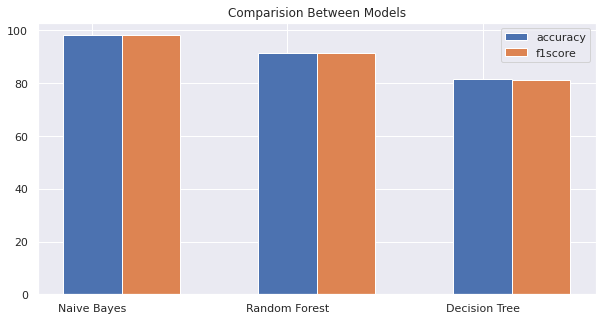

In [26]:
#scores ={"Naive Bayes":98.059  ,"Random Forest":91.4 ,"Decision Tree": 81.5}
plt.figure(figsize=(10,5))
scores=["Naive Bayes","Random Forest","Decision Tree"]
accscore=[98.059,91.4,81.5]
f1score=[98.061,91.5,81.1]
w=0.3
bar1=np.arange(len(scores))
bar2=[i+w for i in bar1]

plt.bar(bar1,accscore,w,label="accuracy")
plt.bar(bar2,f1score,w,label="f1score")
plt.xticks(bar1, scores)
plt.legend()
plt.title("Comparision Between Models")
plt.show()


In [60]:
#Feature Engineering: Feature engineering is the process of creating new features from the existing data to improve the model's performance.
from Bio import SeqIO
from collections import defaultdict
import pandas as pd

# Load the DNA sequences
file_path = "/Users/santruptshekhar/Desktop/healthcare/human/human_data.txt"
sequences = list(SeqIO.parse(file_path, "fasta"))
print(f"Loaded {len(sequences)} sequences")

# Check if any sequences were loaded
if not sequences:
    print("No sequences found in the file!")
else:
    print(f"Loaded {len(sequences)} sequences")


# Calculate k-mer frequencies
k = 3
kmer_freqs = defaultdict(lambda: defaultdict(int))
for sequence in sequences:
    print(f"Processing sequence {sequence.id}")
    for i in range(len(sequence.seq) - k + 1):
        kmer = str(sequence.seq[i:i+k])
        kmer_freqs[sequence.id][kmer] += 1
print(f"Calculated k-mer frequencies for {len(kmer_freqs)} sequences")

# Convert the k-mer frequencies to a pandas DataFrame
data = []
for sequence_id, kmer_freqs_seq in kmer_freqs.items():
    print(f"Processing sequence {sequence_id}")
    for kmer, freq in kmer_freqs_seq.items():
        data.append({"sequence_id": sequence_id, "kmer": kmer, "frequency": freq})
df = pd.DataFrame(data)
print(f"Created DataFrame with {len(df)} rows")
print(df)

Loaded 0 sequences
No sequences found in the file!
Calculated k-mer frequencies for 0 sequences
Created DataFrame with 0 rows
Empty DataFrame
Columns: []
Index: []


In [67]:
#Hyperparameter Tuning: Hyperparameter tuning is the process of finding the optimal set of hyperparameters for a machine learning algorithm. You can use techniques such as grid search, random search, and Bayesian optimization to find the best hyperparameters for your model.
from sklearn.model_selection import GridSearchCV

# Define the hyperparameter grid
param_grid = {
    "n_estimators": [10, 50, 100],
    "max_depth": [3, 5, 7],
    "min_samples_split": [2, 5, 10],
}

# Define the Random Forest model
clf = RandomForestClassifier(random_state=0)

# Perform grid search
grid_search = GridSearchCV(clf, param_grid, cv=5, scoring="accuracy")
grid_search.fit(X, y)

# Print the best hyperparameters
print("Best hyperparameters: ", grid_search.best_params_)

Best hyperparameters:  {'max_depth': 7, 'min_samples_split': 2, 'n_estimators': 10}


In [68]:
from sklearn.model_selection import cross_val_score

# Define the Random Forest model
clf = RandomForestClassifier(n_estimators=100, max_depth=3, random_state=0)

# Perform cross-validation
scores = cross_val_score(clf, X, y, cv=5, scoring="accuracy")

# Print the cross-validation scores
print("Cross-validation scores: ", scores)
print("Mean cross-validation score: ", np.mean(scores))

Cross-validation scores:  [0.32191781 0.32534247 0.32305936 0.31849315 0.38242009]
Mean cross-validation score:  0.33424657534246577


In [81]:
import pandas as pd
import numpy as np
import Bio
import matplotlib.pyplot as plt
from Bio import SeqIO
from collections import defaultdict
from sklearn.model_selection import StratifiedKFold, cross_val_score, cross_val_predict
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import seaborn as sns

# Function to extract k-mers (handling empty sequences)
def getKmers(sequence, size=6):
    if not sequence:  # Check if sequence is empty
        return []
    return [sequence[x:x+size].upper() for x in range(len(sequence) - size + 1)]

# Function to get evaluation metrics
def get_metrics(y_test, y_predicted):
    accuracy = accuracy_score(y_test, y_predicted)
    precision = precision_score(y_test, y_predicted, average='weighted')
    recall = recall_score(y_test, y_predicted, average='weighted')
    f1 = f1_score(y_test, y_predicted, average='weighted')
    return accuracy, precision, recall, f1
l,
# Load DNA sequences (handle potential errors)
try:
    file_path = "/Users/santruptshekhar/Desktop/healthcare/human/human_data.txt"
    sequences = list(SeqIO.parse(file_path, "fasta"))
except Exception as e:
    print("Error loading sequences:", e)
    sequences = []  # Set sequences to empty list if loading fails

# Check if any sequences were loaded
if not sequences:
    print("No sequences found in the file!")
else:
    print(f"Loaded {len(sequences)} sequences")

# ... rest of the code for data processing (assuming 'humandata' is created)

# K-mer calculation with handling of empty sequences
humandata['words'] = humandata.apply(lambda x: getKmers(x['sequence']), axis=1)

# Convert words to strings and create CountVectorizer
humandata["in_string"] = humandata["words"].apply(lambda x: ' '.join(x))
cv = CountVectorizer(ngram_range=(4, 4))
X = cv.fit_transform(humandata["in_string"])

# KNN model training and evaluation
y = humandata.loc[:, 'class'].values
knn = KNeighborsClassifier(n_neighbors=5)  # Initializing with n_neighbors=5

# Stratified K-Fold cross-validation for robust evaluation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(knn, X, y, cv=cv, scoring='f1_micro')

# Print evaluation metrics
print("KNN Classifier (F1-score):")
print(f"Mean F1-score: {scores.mean():.5f} (std: {scores.std():.5f})")


No sequences found in the file!
KNN Classifier (F1-score):
Mean F1-score: 0.77717 (std: 0.04664)
